In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

random_state = 42
np.random.seed(random_state)

plt.style.use("seaborn-v0_8")

base_dir = "0_pics/"
os.makedirs(base_dir, exist_ok=True)

## 1. Data Acquisition


In [67]:
df = pd.read_csv("train.csv")
num_rows, num_cols = df.shape
print("Rows: ", num_rows)
print("Columns: ", num_cols)

Rows:  252175
Columns:  91


In [68]:
display(df.describe())
display(df.info())
display(df.head())

,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
count,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,...,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000,252175.000000
mean,1998.350380,43.379379,1.555258,8.643927,1.160078,-6.526075,-9.532049,-2.366866,-1.788645,3.713079,...,15.723383,-73.290415,41.480537,38.046821,0.334712,17.927021,-26.502617,4.487977,19.875335,1.309523
std,10.497739,6.066547,51.551085,35.235495,16.336577,22.841967,12.809154,14.530697,7.963275,10.553843,...,31.982900,174.935574,122.250383,94.576578,16.020922,114.053576,173.680285,13.286064,185.158800,22.113525
min,1956.000000,3.455260,-334.953220,-301.005060,-149.962040,-181.953370,-72.717370,-111.017810,-68.404510,-119.762620,...,-437.722030,-2984.920970,-1810.689190,-1848.702260,-272.289050,-2343.894110,-3819.933620,-233.456480,-7458.378150,-286.031200
25%,1994.000000,39.959775,-25.651750,-11.524900,-8.492585,-20.587910,-18.402445,-10.770340,-6.472825,-2.295965,...,-1.788255,-139.034460,-21.014560,-4.630075,-6.748720,-31.246970,-102.175470,-2.536810,-59.734690,-8.820370
50%,2002.000000,44.250440,8.655610,10.516440,-0.641920,-5.999260,-11.189750,-2.072920,-1.727900,3.821990,...,9.132400,-53.168610,28.673440,33.597330,0.819000,15.843510,-21.613560,3.145290,7.774840,0.062980
75%,2006.000000,47.822515,36.248650,29.792790,8.766685,7.739900,-2.448645,6.512925,2.913400,9.938425,...,26.206820,13.411780,89.181345,77.881735,8.452415,67.776640,51.897840,9.999465,85.838080,9.651235
max,2009.000000,61.970140,384.065730,318.868960,228.412110,262.068870,166.236890,160.815220,82.942190,92.792850,...,840.973380,4469.454870,3210.701700,1734.079690,199.121500,3662.065650,2833.608950,275.353660,7240.653730,600.766240


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252175 entries, 0 to 252174
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    252175 non-null  int64  
 1   S0      252175 non-null  float64
 2   S1      252175 non-null  float64
 3   S2      252175 non-null  float64
 4   S3      252175 non-null  float64
 5   S4      252175 non-null  float64
 6   S5      252175 non-null  float64
 7   S6      252175 non-null  float64
 8   S7      252175 non-null  float64
 9   S8      252175 non-null  float64
 10  S9      252175 non-null  float64
 11  S10     252175 non-null  float64
 12  S11     252175 non-null  float64
 13  S12     252175 non-null  float64
 14  S13     252175 non-null  float64
 15  S14     252175 non-null  float64
 16  S15     252175 non-null  float64
 17  S16     252175 non-null  float64
 18  S17     252175 non-null  float64
 19  S18     252175 non-null  float64
 20  S19     252175 non-null  float64
 21  S20     25

None

,Year,S0,S1,S2,S3,S4,S5,S6,S7,S8,...,S80,S81,S82,S83,S84,S85,S86,S87,S88,S89
0,2007,44.76752,114.82099,3.83239,27.99928,1.49153,-15.90853,28.24844,3.61650,-7.24653,...,-1.89619,-471.02844,411.56205,443.01198,19.30254,309.07806,-336.91706,-14.70547,-474.44157,31.32820
1,2004,52.28942,75.73319,11.35941,-6.20582,-27.64559,-30.75995,12.50955,7.47877,9.88498,...,4.57060,1.36110,-6.52977,59.48672,3.69790,-36.92252,44.08077,3.39993,-70.07591,3.86143
2,2005,33.81773,-139.07371,134.19332,17.85216,63.47408,-25.28005,-34.65911,-5.99135,1.27848,...,54.16608,15.04530,39.09107,39.03041,3.68708,-61.88547,45.68115,6.39822,3.24471,35.74749
3,1998,41.60866,3.17811,-3.97174,23.53564,-19.68553,20.74407,18.80866,6.24474,-7.98424,...,28.08591,295.88684,54.02395,102.02880,40.47711,15.10258,-250.32293,2.81288,56.05172,3.60432
4,1987,44.49525,-32.25270,58.08217,3.73684,-32.53274,-18.72885,-15.85665,-3.34607,22.63786,...,31.44988,-136.50457,-85.11989,-74.96342,9.56921,-100.61689,-133.29315,9.19246,-97.37953,30.11015


### Data Cleaning


In [69]:
print("Null rows:", df.shape[0] - df.dropna().shape[0])
print("Duplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Null rows: 0
Duplicated rows: 52


## 2. Data Visualization


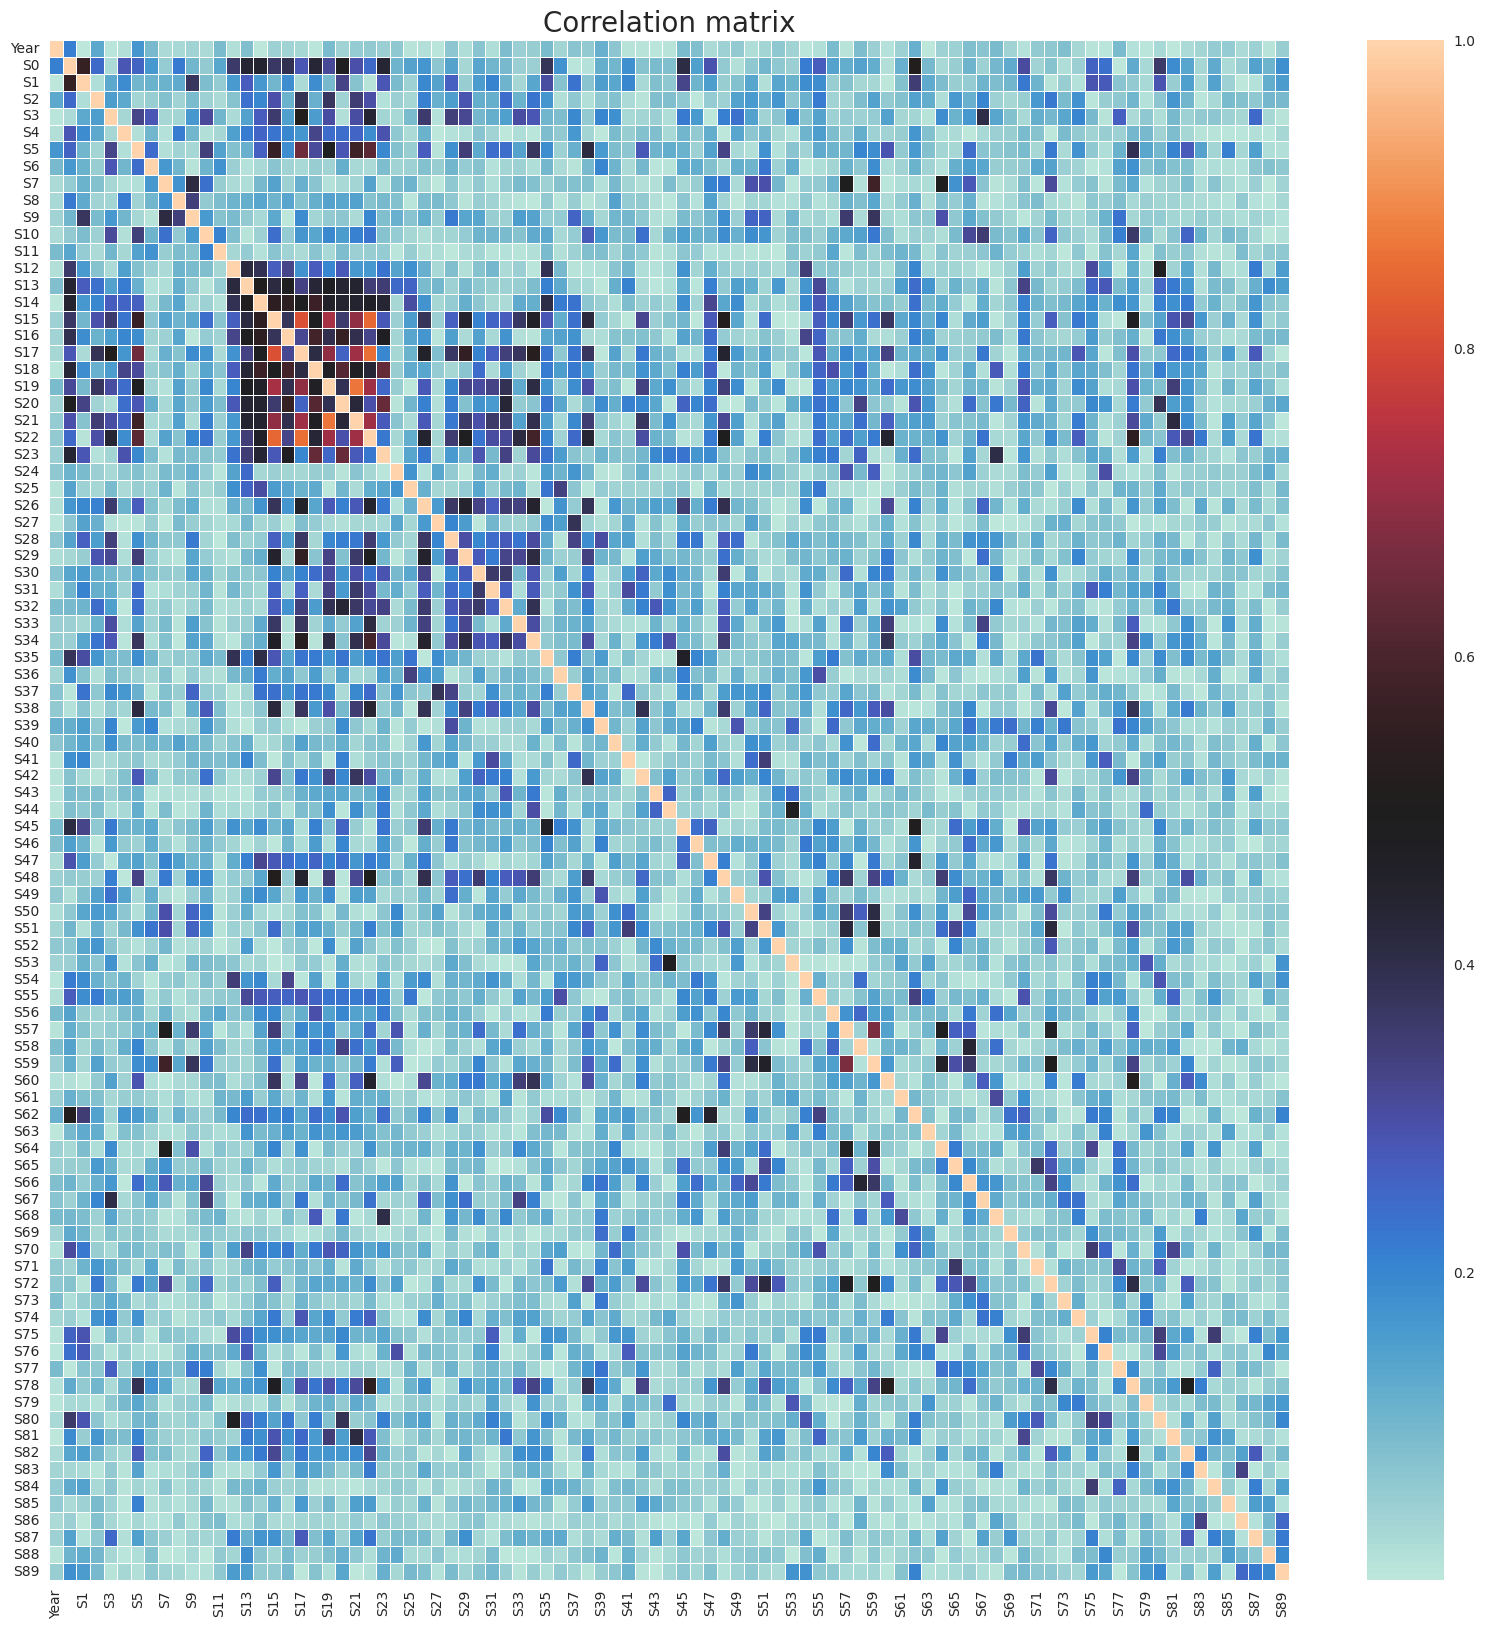

In [70]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr().abs(), cmap="icefire", linewidths=0.5)
plt.title("Correlation matrix", fontsize=20)
plt.xticks(rotation=90)
plt.savefig(base_dir + "0_corr_matrix.svg", format="svg", facecolor="white")
plt.show()

The dataset shows a low degree of correlation among its various features. However, a closer examination of the top-left quadrant reveals a cluster of variables exhibiting stronger correlation. A zoomed-in view of this region is provided below for further analysis.


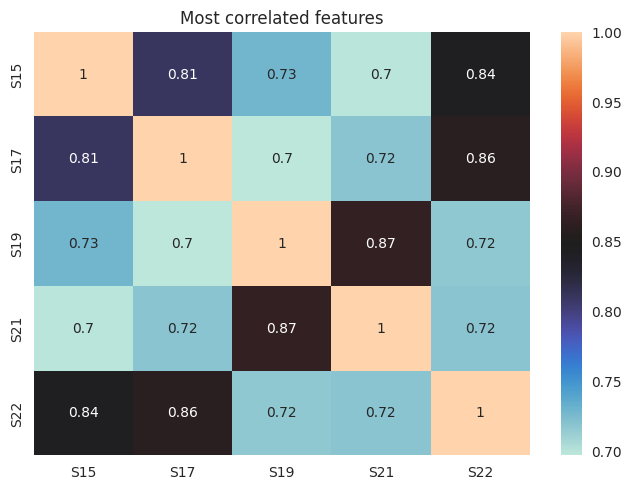

In [71]:
corr = df.corr().abs()
corr.replace(1, -10, inplace=True)
corr = corr[corr.max(axis=1) > 0.8]
corr.replace(-10, 1, inplace=True)
corr.drop(corr.columns.difference(corr.index), axis=1, inplace=True)

sns.heatmap(corr, cmap="icefire", annot=True)
plt.yticks(rotation=90)
plt.title("Most correlated features")
plt.savefig(base_dir + "0_corr_matrix_features.svg", format="svg", facecolor="white")
plt.show()

/tmp/ipykernel_57567/3143761166.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr["Year"], y=corr.index, palette="icefire")


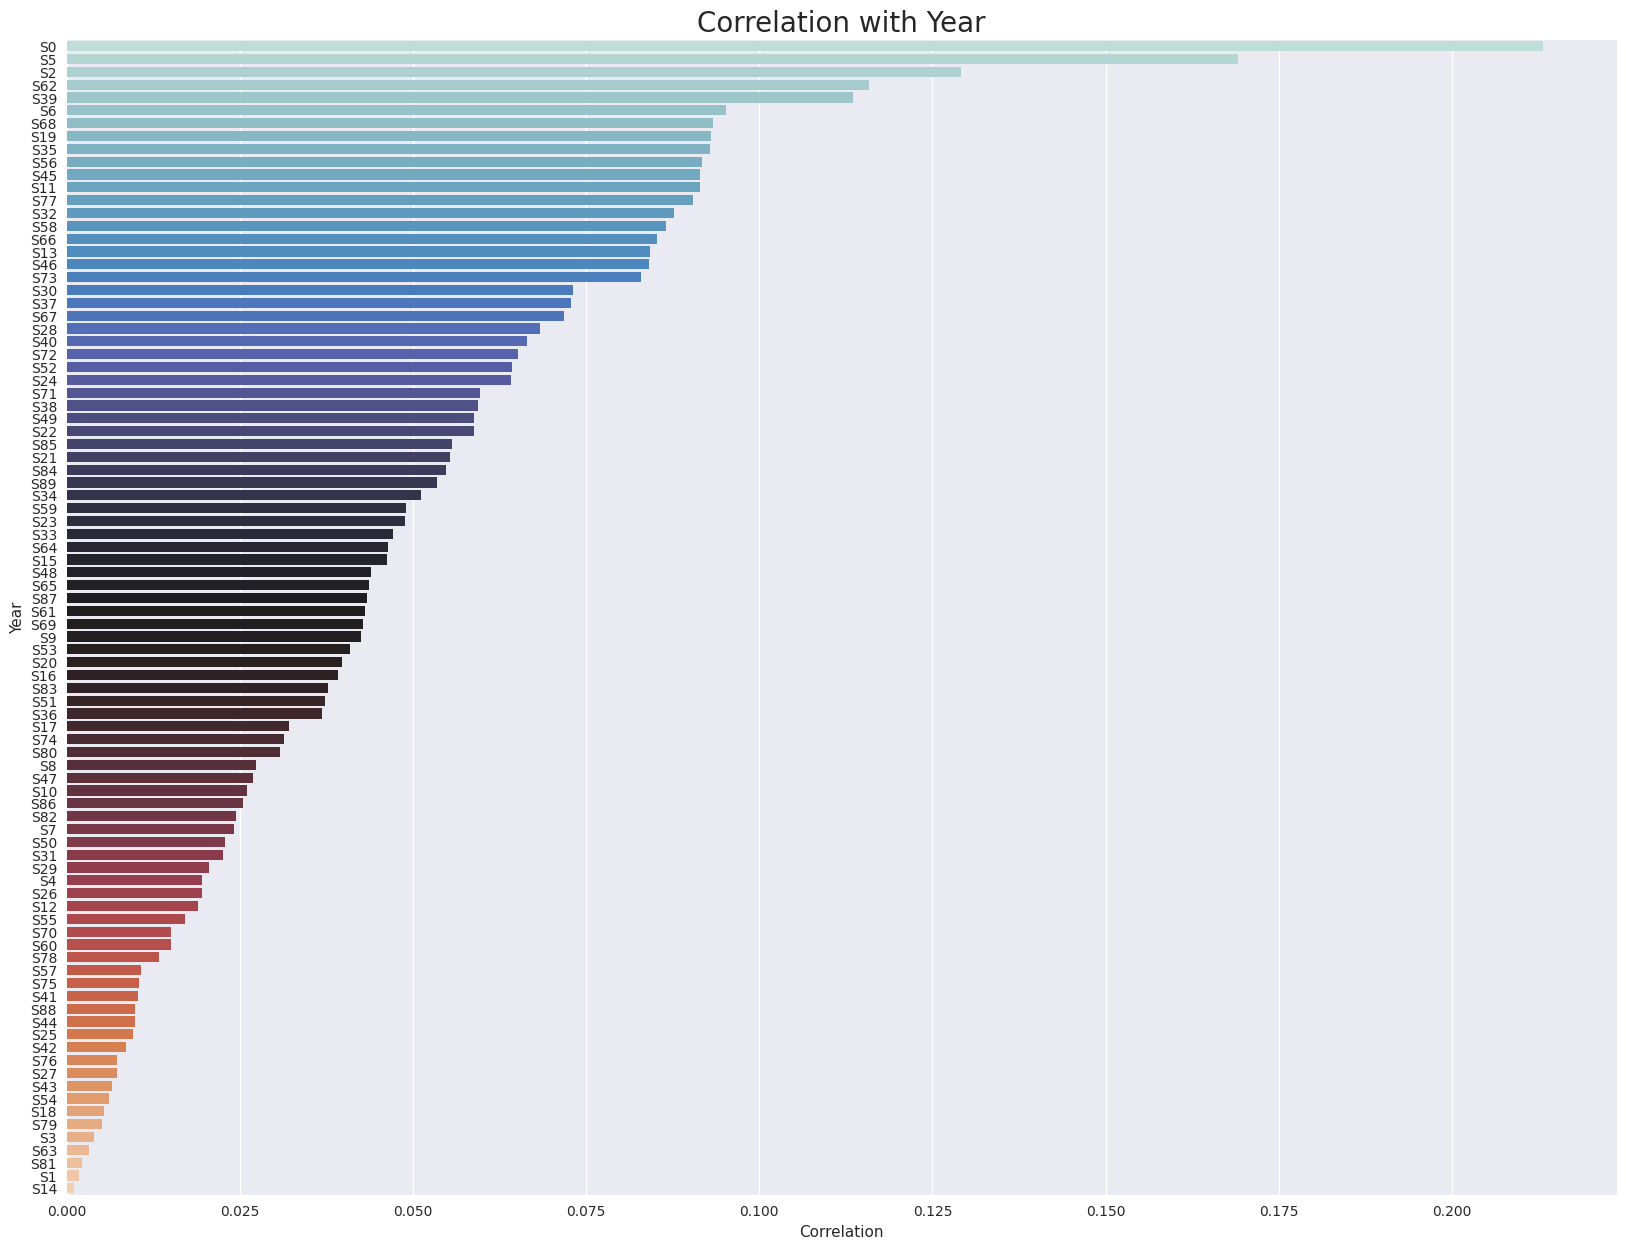

In [72]:
# calculate the correlation and sort by Year
corr = df.corr().abs()
corr.sort_values(by=["Year"], ascending=False, inplace=True)
corr = corr[1:]

# plot the correlation with barplot
plt.figure(figsize=(20, 15))
sns.barplot(x=corr["Year"], y=corr.index, palette="icefire")
plt.xlabel("Correlation")
plt.ylabel("Year")
plt.title("Correlation with Year", fontsize=20)
plt.show()

###### Forse da cancellare visto che non è rilevante

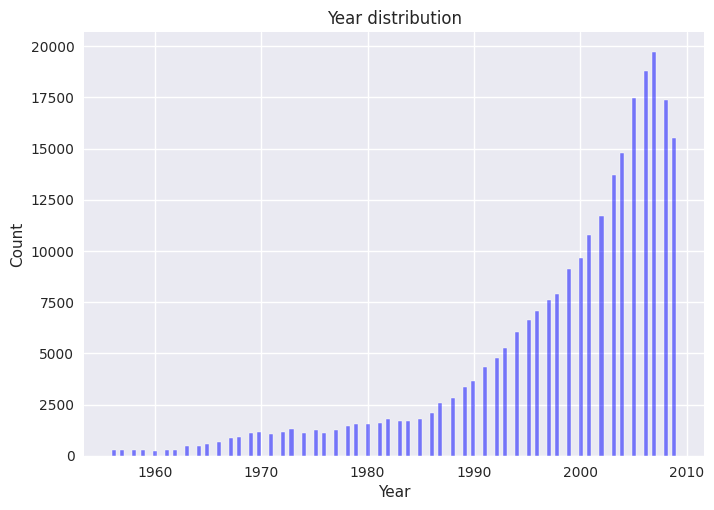

In [73]:
mu, std = df["Year"].mean(), df["Year"].std()
x = np.linspace(df["Year"].min(), df["Year"].max(), 100)
gaussian_distribution = stats.norm.pdf(x, mu, std)

plt.title("Year distribution")
sns.histplot(data=df["Year"], fill=True, color="b", alpha=0.5)
plt.savefig(base_dir + "0_year_distribution.svg", format="svg", facecolor="white")
plt.show()

In [96]:
display(
    pd.DataFrame(
        [df.Year.mean(), df.Year.median(), df.Year.mode()[0], df.Year.std()],
        index=["Mean", "Median", "Mode", "Std deviation"],
        columns=["Value"],
    )
)

,Value
Mean,1998.350143
Median,2002.000000
Mode,2007.000000
Std deviation,10.497821


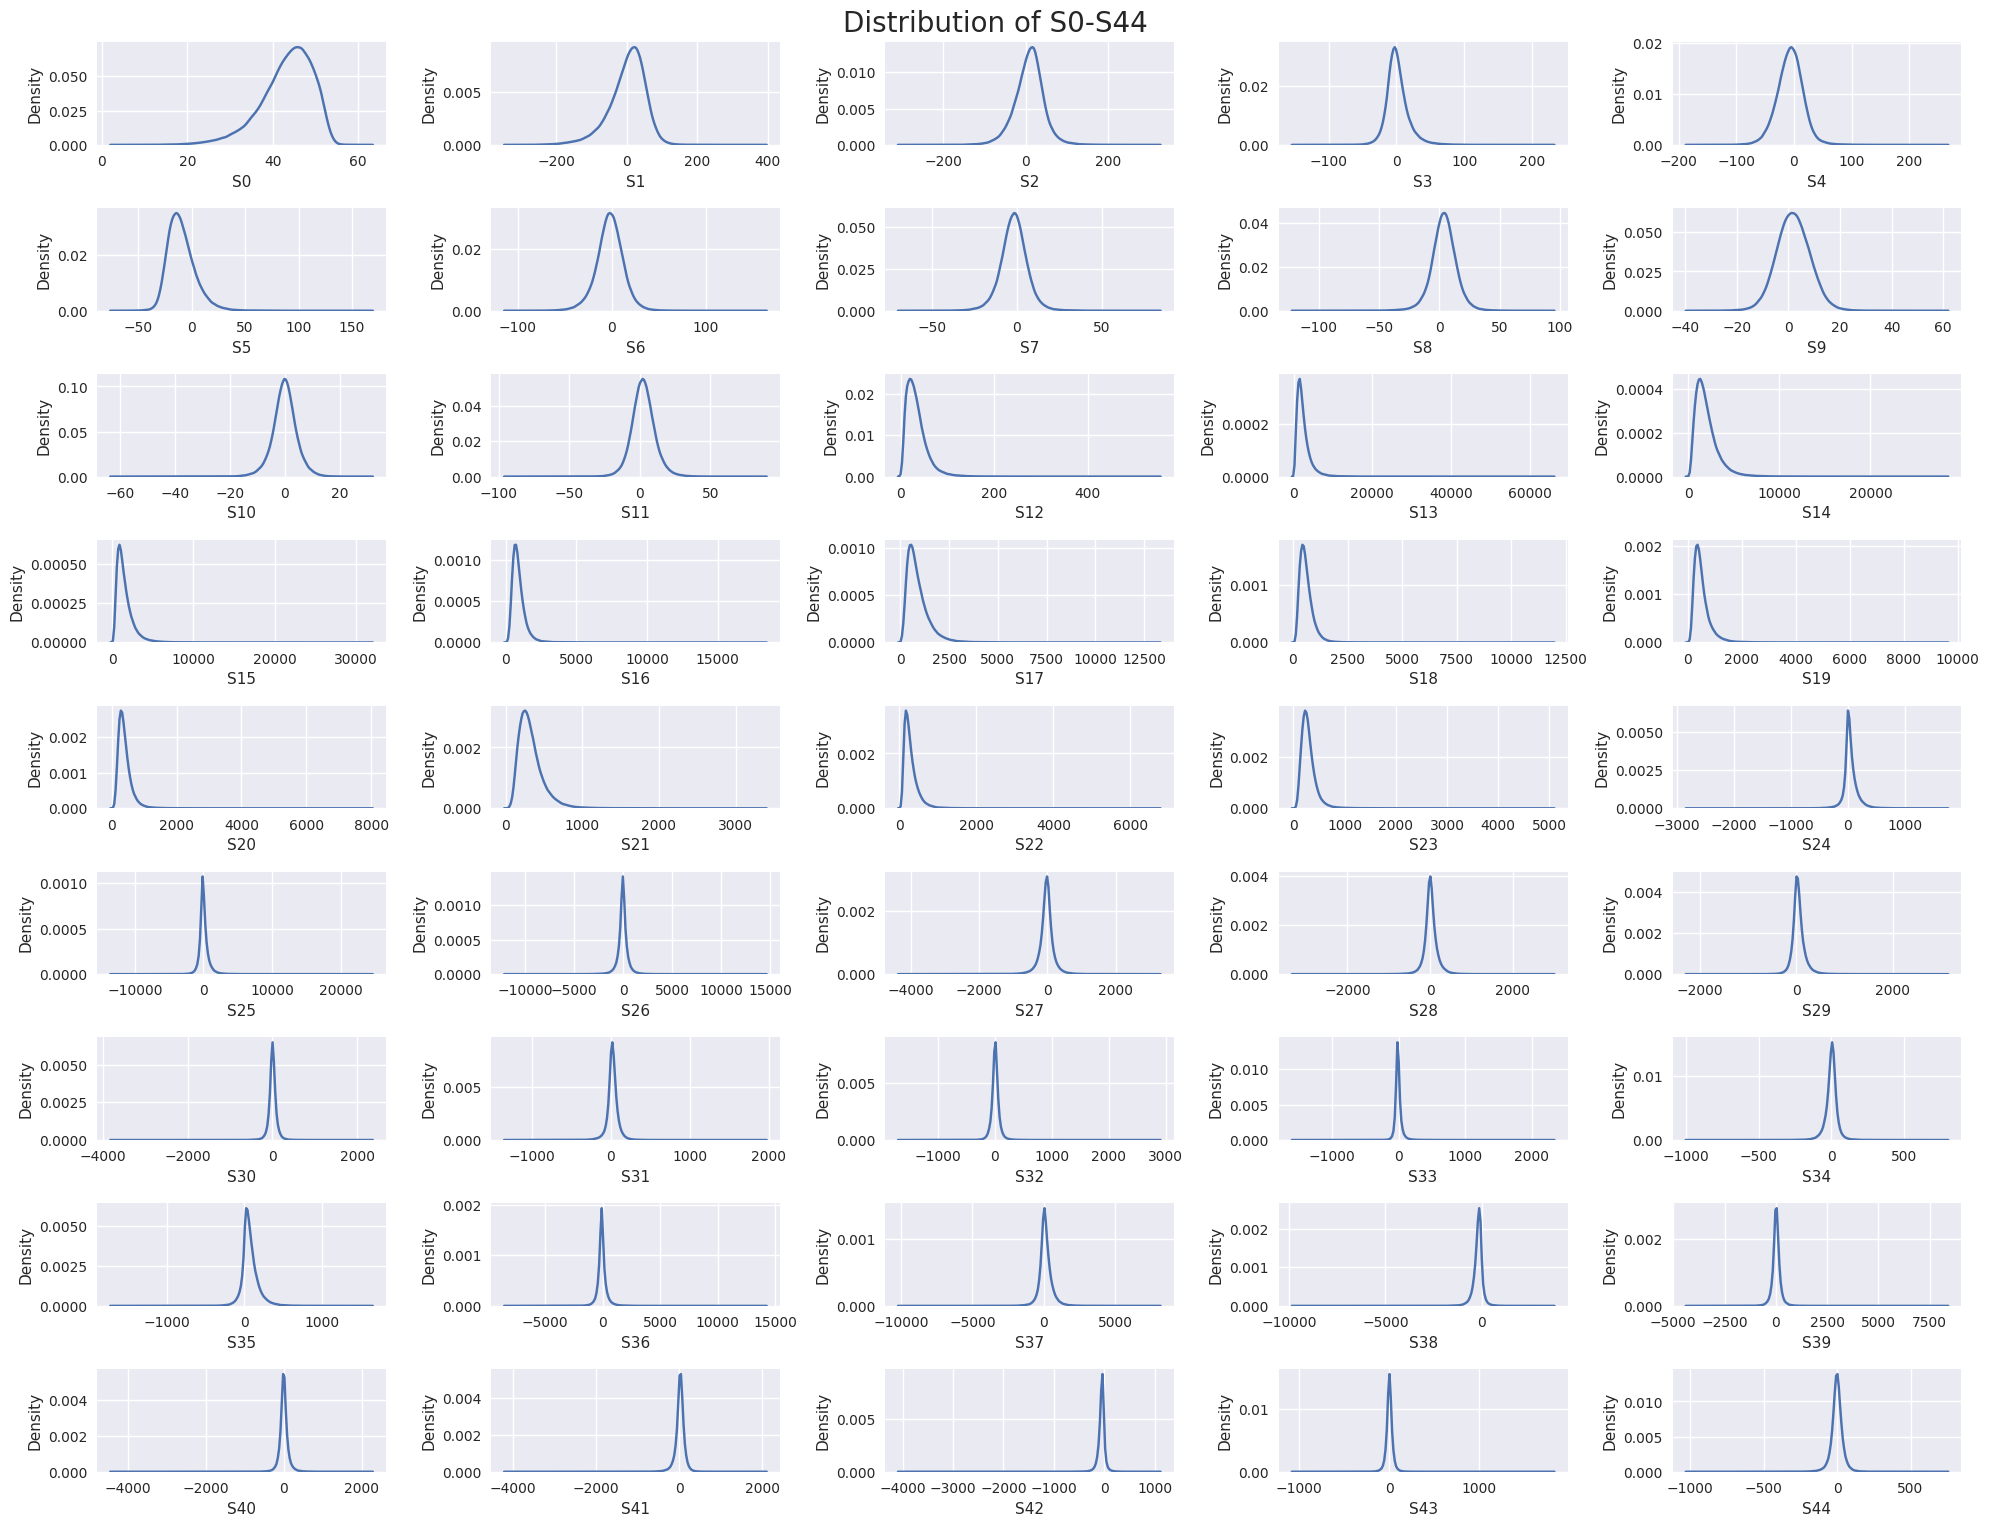

In [75]:
pos = 1
fig = plt.figure(figsize=(20, 30))
fig.suptitle("Distribution of S0-S44", y=0.99, fontsize=20)

for col in df.columns[1:46]:
    plt.subplot(18, 5, pos)
    plt.xlabel(col)
    sns.kdeplot(df[col])
    pos = pos + 1

plt.tight_layout()
plt.savefig(base_dir + "0_all_distributions_1.svg", format="svg", facecolor="white")
plt.show()

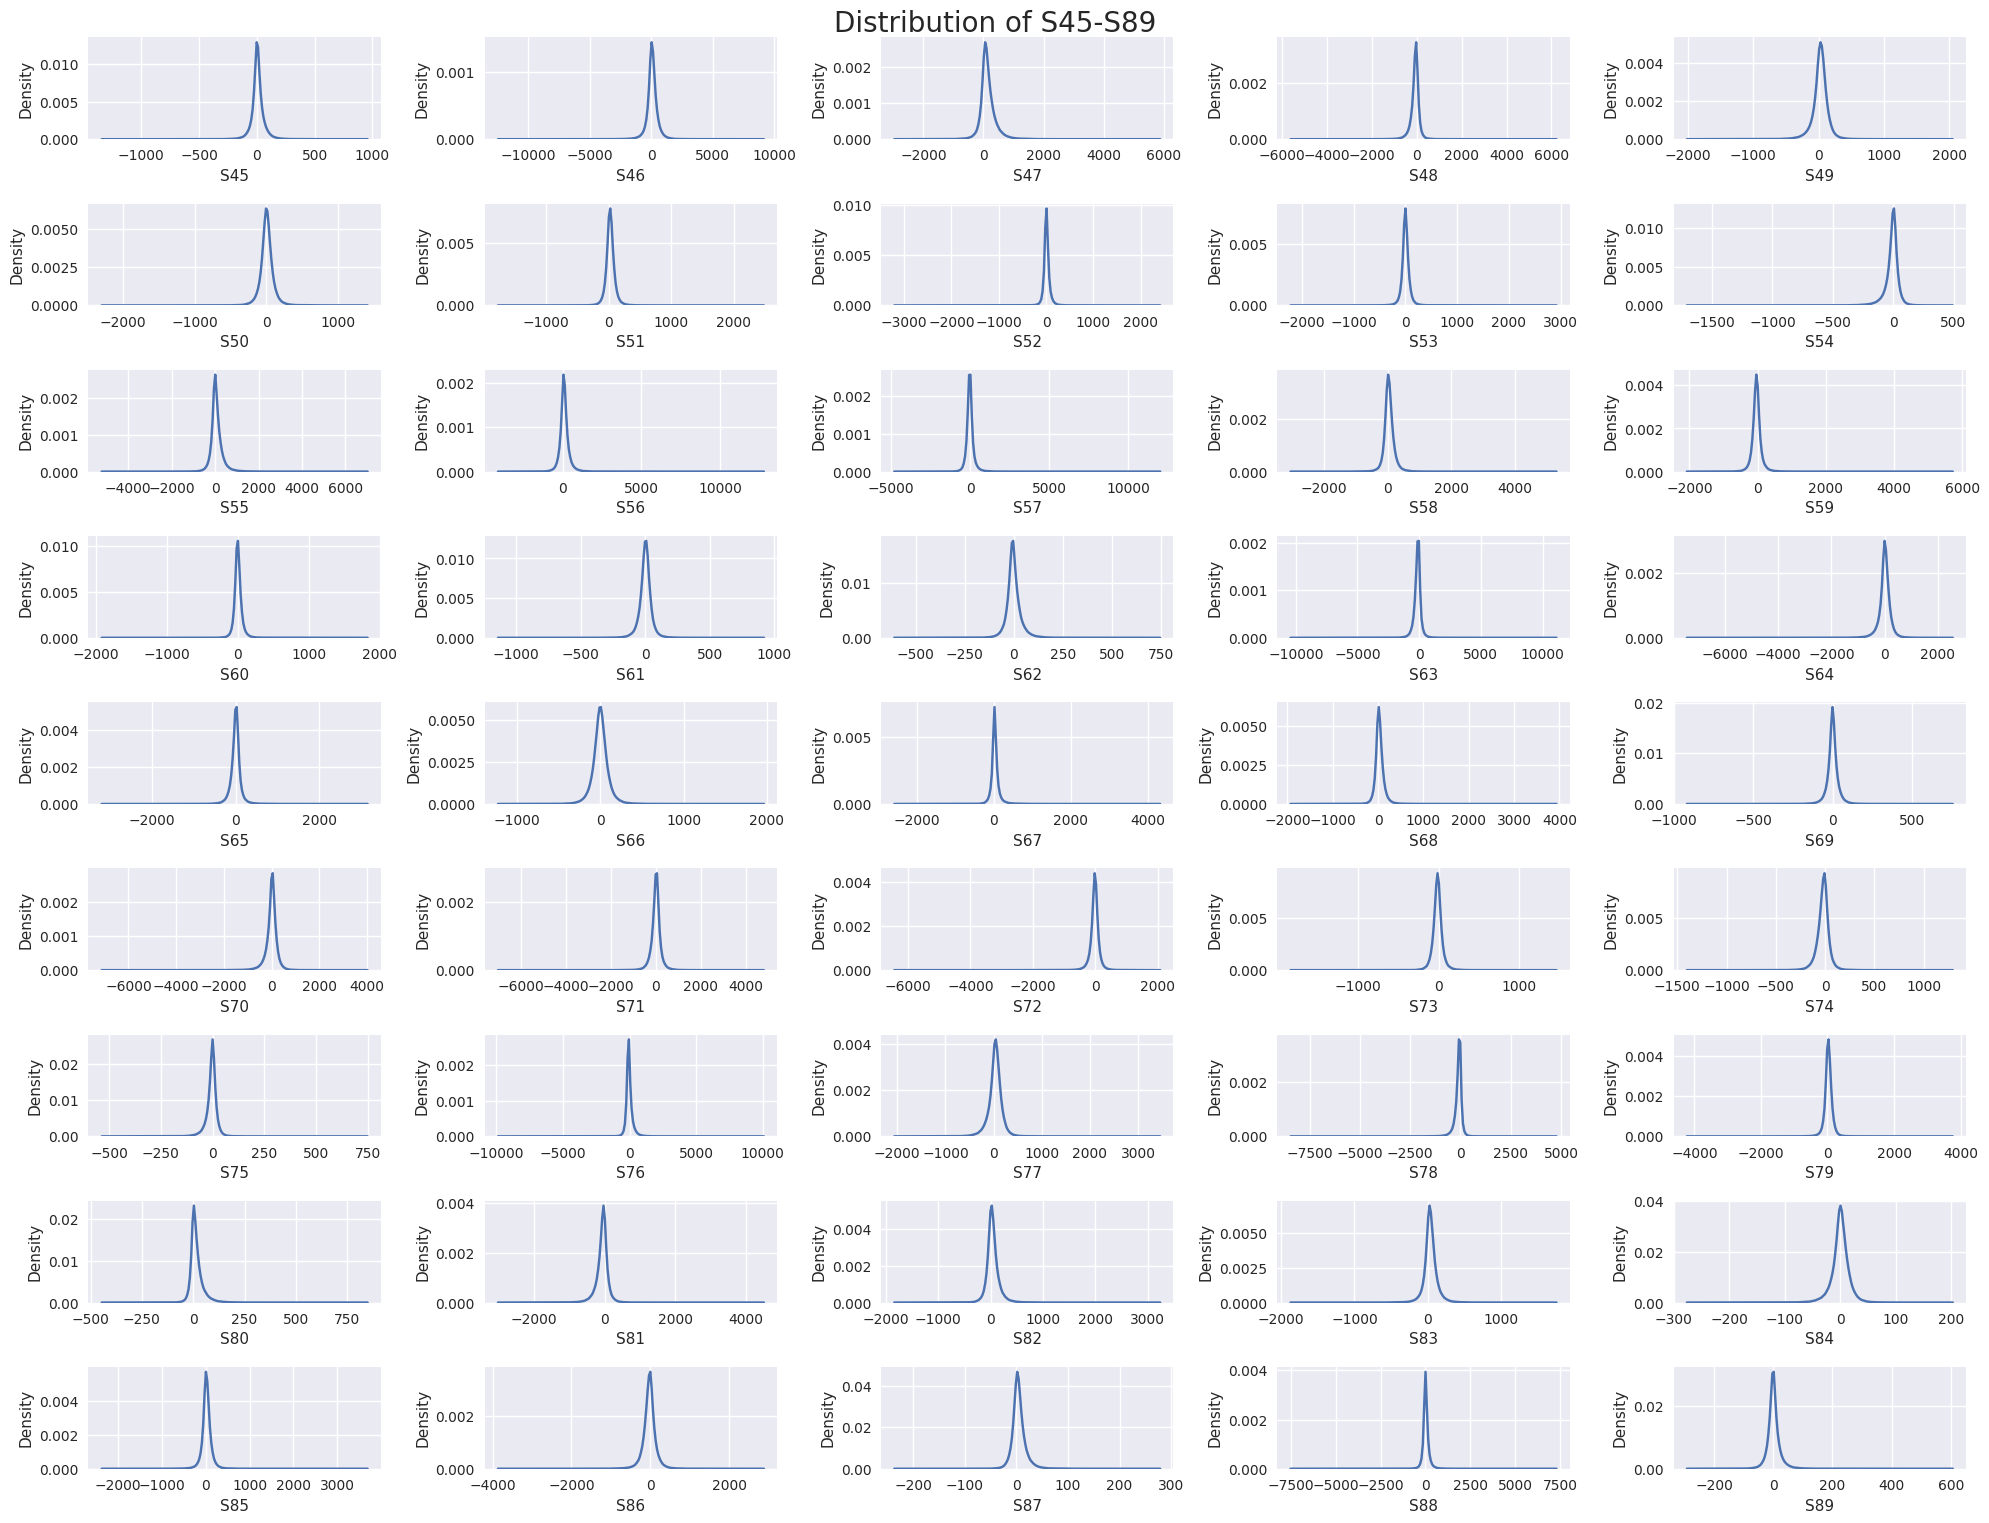

In [76]:
pos = 1
fig = plt.figure(figsize=(20, 30))
fig.suptitle("Distribution of S45-S89", y=0.99, fontsize=20)

for col in df.columns[46:]:
    plt.subplot(18, 5, pos)
    plt.xlabel(col)
    sns.kdeplot(df[col])
    pos = pos + 1

plt.tight_layout()
plt.savefig(base_dir + "0_all_distributions_2.svg", format="svg", facecolor="white")
plt.show()

All the attributes exhibit a **Gaussian distribution** with varying skewness, and their means are centered around 0 (or close to it), except for the attribute `S0`.\
The plots indicate that the distribution ranges differ a lot across the various columns. Therefore, it’s probable that we will require a preprocessing model to **rescale** the data.